In [ ]:
pip install torch torchvision transformers pillow matplotlib opencv-python

In [ ]:
from transformers import pipeline
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load pipeline with GPU support if available
pipe = pipeline(
    task="depth-estimation",
    model="LiheYoung/depth-anything-small-hf",
    device=-1  # Use CPU (-1) or specify GPU index
)

# Load and preprocess the image
image_path = "/content/rgb.jpg"
image = Image.open(image_path).convert("RGB")

depth = pipe(image)["depth"]

depth_array = np.array(depth)

depth_normalized = (depth_array - depth_array.min()) / (depth_array.max() - depth_array.min())

depth_gray = (depth_normalized * 255).astype(np.uint8)
depth_image = Image.fromarray(depth_gray)
depth_image.save("depth_map.png")

# # Apply a color map and save
# plt.imsave("depth_map_colored.png", depth_normalized, cmap='plasma')


array([[  1,   1,   1, ...,   1,   1,   1],
       [  1,   1,   1, ...,   1,   1,   1],
       [  1,   1,   1, ...,   1,   1,   1],
       ...,
       [241, 239, 239, ..., 250, 250, 249],
       [242, 240, 241, ..., 250, 251, 252],
       [212, 240, 242, ..., 250, 251, 234]], dtype=uint8)
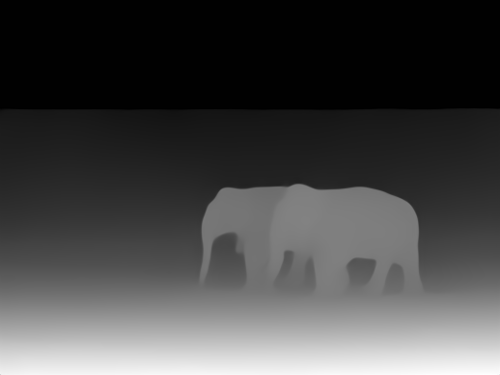

In [ ]:
depth_gray

In [ ]:
from transformers import pipeline
from PIL import Image
import numpy as np
import os

# Load pipeline withCPU , put 0 if yiu have GPU
pipe = pipeline(
    task="depth-estimation",
    model="LiheYoung/depth-anything-small-hf",
    device=-1
)

input_dir = "/content/images"
output_dir = "/content/depth_maps/"
# combined_array_path = "/content/combined_depth_arrays.npy"

os.makedirs(output_dir, exist_ok=True)

all_depth_arrays = []

image_files = [f for f in os.listdir(input_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

for idx, image_file in enumerate(image_files):
    image_path = os.path.join(input_dir, image_file)

    try:
        image = Image.open(image_path).convert("RGB")

        depth = pipe(image)["depth"]

        depth_array = np.array(depth)

        depth_normalized = (depth_array - depth_array.min()) / (depth_array.max() - depth_array.min())

        depth_gray = (depth_normalized * 255).astype(np.uint8)
        depth_image = Image.fromarray(depth_gray)
        depth_image.save(os.path.join(output_dir, f"depth_map_{idx+1}.png"))

        all_depth_arrays.append(depth_array)

        print(f"Processed {image_file} ({idx+1}/{len(image_files)})")

    except Exception as e:
        print(f"Error processing {image_file}: {e}")

# Convert list of depth arrays to a single combined NumPy array
combined_depth_arrays = np.array(all_depth_arrays)

# Save the combined depth arrays as a .npy file
# np.save(combined_array_path, combined_depth_arrays)

print("Depth estimation completed for all images!")


Processed n008-2018-05-21-11-06-59-0400__CAM_FRONT__1526915639012465.jpg (1/100)
Processed n008-2018-05-21-11-06-59-0400__CAM_FRONT__1526915362912465.jpg (2/100)
Processed n008-2018-05-21-11-06-59-0400__CAM_FRONT__1526915381512465.jpg (3/100)
Processed n008-2018-05-21-11-06-59-0400__CAM_FRONT__1526915629862465.jpg (4/100)
Processed n008-2018-05-21-11-06-59-0400__CAM_FRONT__1526915328012465.jpg (5/100)
Processed n008-2018-05-21-11-06-59-0400__CAM_FRONT__1526915322512465.jpg (6/100)
Processed n008-2018-05-21-11-06-59-0400__CAM_FRONT__1526915325512465.jpg (7/100)
Processed n008-2018-05-21-11-06-59-0400__CAM_FRONT__1526915652912465.jpg (8/100)
Processed n008-2018-05-21-11-06-59-0400__CAM_FRONT__1526915678512916.jpg (9/100)
Processed n008-2018-05-21-11-06-59-0400__CAM_FRONT__1526915663912465.jpg (10/100)
Processed n008-2018-05-21-11-06-59-0400__CAM_FRONT__1526915372412465.jpg (11/100)
Processed n008-2018-05-21-11-06-59-0400__CAM_FRONT__1526915455012465.jpg (12/100)
Processed n008-2018-05-21

In [ ]:
combined_array_path = "/content/combined_depth_arrays.npy"

# Save the combined depth arrays as a .npy file
np.save(combined_array_path, combined_depth_arrays)